# Fig 6 overlapping sources gif

This notebook creates an animated visualizer showing how overlapping sources can influence estimates.

Based on Fig 6 (a-c) of the oscillation methods paper. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from neurodsp.spectral import compute_spectrum, trim_spectrum
from neurodsp.sim import sim_powerlaw

In [2]:
import seaborn as sns
sns.set_context('poster')

In [3]:
# Import custom code
from code.utils import sweep_values
from code.gif import clear_output, _gif_plot_output
from code.plts import plot_timeseries, plot_spectra, add_lines
from code.sim import mu_wave

## SETTINGS

In [4]:
# Simulation settings
fs = 1000
n_seconds = 10
times = np.arange(0, n_seconds, 1/fs)

freq1 = 10
freq2 = 11
exp = -1.5

In [5]:
# Measure settings
psd_settings = {'nperseg' : 2000, 'noverlap' : 500}

In [6]:
# Plot settings
c1, c2, c3 = ("#CC2B1C", "#3C2C71", "#115C12")

xlim = [2000, 3000]

ylim1 = [-3.75, 0.25]
ylim2 = [-3.25, 0.75]

In [7]:
# Load the head image to use
img = mpimg.imread('img/mesh_nyhead.png')

In [8]:
# Create the set of values to sweep across
mid, low, high = 10, 8, 12
step = 0.5
freq2s = sweep_values(mid, low, high, step)

phases = [0, np.pi/4, np.pi/2, np.pi, 5/4*np.pi, 6/4*np.pi, 7/4*np.pi]

In [9]:
# Set whether to save out
SAVE = False

## DEFINE AXES

In [10]:
def make_axes():
    
    fig = plt.figure(figsize=(12, 6))#, constrained_layout=True)
    gs = fig.add_gridspec(6, 6)
    ax0 = fig.add_subplot(gs[0, 0:2])
    ax0.axis('off')
    ax1 = fig.add_subplot(gs[1:, 0:2])
    ax2 = fig.add_subplot(gs[0:2, 2:4])
    ax3 = fig.add_subplot(gs[2:4, 2:4])
    ax4 = fig.add_subplot(gs[4:, 2:4])
    
    ax5 = fig.add_subplot(gs[0:2, 4:])
    ax6 = fig.add_subplot(gs[2:4, 4:])
    ax7 = fig.add_subplot(gs[4:, 4:])
    
    return fig, ax0, ax1, [ax2, ax3, ax4], [ax5, ax6, ax7]

## SIMULATE SIGNAL

In [11]:
# Create the aperiodic component to use
ap = sim_powerlaw(n_seconds, fs, exp, f_range=(2, 50), variance=0.15)

In [12]:
# Frequency difference
w1_fr = mu_wave(times, freq=freq1) + ap
w2_fr = mu_wave(times, freq=freq2) + ap
w3_fr = w1_fr + w2_fr

f1, p1_fr = trim_spectrum(*compute_spectrum(w1_fr, fs, **psd_settings), [5, 35])
f2, p2_fr = trim_spectrum(*compute_spectrum(w2_fr, fs, **psd_settings), [5, 35])
f3, p3_fr = trim_spectrum(*compute_spectrum(w3_fr, fs, **psd_settings), [5, 35])

In [13]:
# Phase difference
w1_ph = mu_wave(times, freq=freq1, shift=0) + ap
w2_ph = mu_wave(times, freq=freq1, shift=np.pi) + ap
w3_ph = w1_ph + w2_ph

f1, p1_ph = trim_spectrum(*compute_spectrum(w1_ph, fs, **psd_settings), [5, 35])
f2, p2_ph = trim_spectrum(*compute_spectrum(w2_ph, fs, **psd_settings), [5, 35])
f3, p3_ph = trim_spectrum(*compute_spectrum(w3_ph, fs, **psd_settings), [5, 35])

## EXAMPLE PLOTS

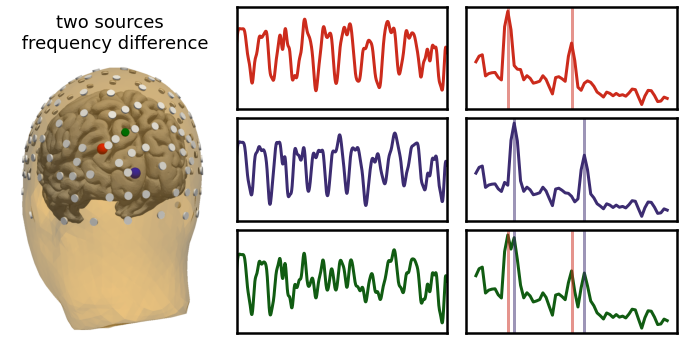

In [14]:
# Create an example panel of the visualizer for the frequency difference
fig, ax0, ax1, axes2, axes3 = make_axes()
ax1.imshow(img)
ax1.axis('off')
ax0.text(0.5, 0.1, 'two sources \n frequency difference', 
         horizontalalignment='center', fontdict={'fontsize' : 18})

plot_timeseries(w1_fr, xlim=xlim, colors=c1, ax=axes2[0])
plot_timeseries(w2_fr, xlim=xlim, colors=c2, ax=axes2[1])
plot_timeseries(w3_fr, xlim=xlim, colors=c3, ax=axes2[2])

plot_spectra(f1, p1_fr, log_freqs=False, colors=c1, ax=axes3[0])
add_lines(axes3[0], freq1, c1, 0.5)
plot_spectra(f2, p2_fr, log_freqs=False, colors=c2, ax=axes3[1])
add_lines(axes3[1], freq2, c2, 0.5)
plot_spectra(f3, p3_fr, log_freqs=False, colors=c3, ax=axes3[2])
add_lines(axes3[2], freq1, c1, 0.5)
add_lines(axes3[2], freq2, c2, 0.5)

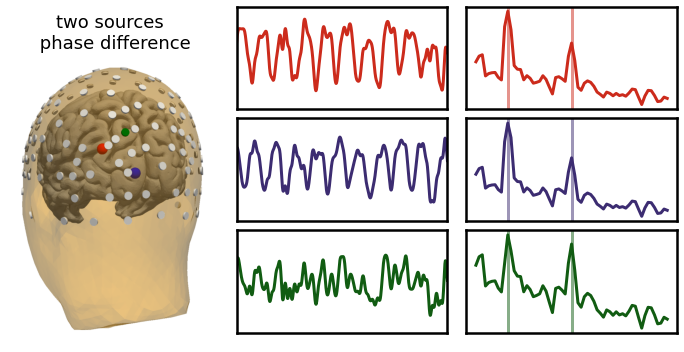

In [15]:
# Create an example panel of the visualizer for the phase difference
fig, ax0, ax1, axes2, axes3 = make_axes()
ax1.imshow(img)
ax1.axis('off')
ax0.text(0.5, 0.1, 'two sources \n phase difference', 
         horizontalalignment='center', fontdict={'fontsize' : 18})

plot_timeseries(w1_ph, xlim=xlim, colors=c1, ax=axes2[0])
plot_timeseries(w2_ph, xlim=xlim, colors=c2, ax=axes2[1])
plot_timeseries(w3_ph, xlim=xlim, colors=c3, ax=axes2[2])

plot_spectra(f1, p1_ph, log_freqs=False, colors=c1, ax=axes3[0])
add_lines(axes3[0], freq1, c1, 0.5)
plot_spectra(f2, p2_ph, log_freqs=False, colors=c2, ax=axes3[1])
add_lines(axes3[1], freq1, c2, 0.5)
plot_spectra(f3, p3_ph, log_freqs=False, colors=c3, ax=axes3[2])
add_lines(axes3[2], freq1, c3, 0.5)

## BUILDER FUNCTIONS

In [16]:
def build_all_fr(freq1, freq2s, sleep=0.75, save=False):
    
    ## Setup
    w1 = mu_wave(times, freq=freq1) + ap
    f1, p1 = trim_spectrum(*compute_spectrum(w1, fs, nperseg=2001, noverlap=500), [5, 35])
    
    ## Create builds
    for b_ind, freq2 in enumerate(freq2s):
        
        w2 = mu_wave(times, freq=freq2) + ap
        w3 = w1 + w2
            
        f2, p2 = trim_spectrum(*compute_spectrum(w2, fs, nperseg=2001, noverlap=500), [5, 35])
        f3, p3 = trim_spectrum(*compute_spectrum(w3, fs, nperseg=2001, noverlap=500), [5, 35])
                
        clear_output(wait=True)
                
        fig, ax0, ax1, axes2, axes3 = make_axes()
        ax1.imshow(img)
        ax1.axis('off')
        ax0.text(0.5, 0.1, 'two sources \n frequency difference', 
                 horizontalalignment='center', fontdict={'fontsize' : 18})

        plot_timeseries(w1, xlim=xlim, colors=c1, ax=axes2[0])
        plot_timeseries(w2, xlim=xlim, colors=c2, ax=axes2[1])
        plot_timeseries(w3, xlim=xlim, colors=c3, ax=axes2[2])

        plot_spectra(f1, p1, log_freqs=False, ylim=ylim1, colors=c1, ax=axes3[0])
        add_lines(axes3[0], freq1, c1, 0.4)
        plot_spectra(f2, p2, log_freqs=False, ylim=ylim1, colors=c2, ax=axes3[1])
        add_lines(axes3[1], freq2, c2, 0.4)
        plot_spectra(f3, p3, log_freqs=False, ylim=ylim2, colors=c3, ax=axes3[2])
        add_lines(axes3[2], freq1, c1, 0.4)
        add_lines(axes3[2], freq2, c2, 0.4)

        _gif_plot_output(fig, save, 'fr' + str(b_ind), 'fig6/fr', sleep)

In [17]:
def build_all_ph(freq, phases, sleep=0.75, save=False):
    
    ## Setup
    w1 = mu_wave(times, freq=freq, shift=0) + ap
    f1, p1 = trim_spectrum(*compute_spectrum(w1, fs, nperseg=2001, noverlap=500), [5, 35])
    
    ## Create builds
    for b_ind, phase in enumerate(phases):
        
        w2 = mu_wave(times, freq=freq1, shift=phase) + ap
        w3 = w1 + w2
            
        f2, p2 = trim_spectrum(*compute_spectrum(w2, fs, nperseg=2001, noverlap=500), [5, 35])
        f3, p3 = trim_spectrum(*compute_spectrum(w3, fs, nperseg=2001, noverlap=500), [5, 35])
                
        clear_output(wait=True)
                
        fig, ax0, ax1, axes2, axes3 = make_axes()
        ax1.imshow(img)
        ax1.axis('off')
        ax0.text(0.5, 0.1, 'two sources \n phase difference', 
                 horizontalalignment='center', fontdict={'fontsize' : 18})

        plot_timeseries(w1, xlim=xlim, colors=c1, ax=axes2[0])
        plot_timeseries(w2, xlim=xlim, colors=c2, ax=axes2[1])
        plot_timeseries(w3, xlim=xlim, colors=c3, ax=axes2[2])

        plot_spectra(f1, p1, log_freqs=False, ylim=ylim1, colors=c1, ax=axes3[0])
        add_lines(axes3[0], freq1, c1, 0.4)
        plot_spectra(f2, p2, log_freqs=False, ylim=ylim1, colors=c2, ax=axes3[1])
        add_lines(axes3[1], freq1, c2, 0.4)
        plot_spectra(f3, p3, log_freqs=False, ylim=ylim2, colors=c3, ax=axes3[2])
        add_lines(axes3[2], freq1, c3, 0.4)

        _gif_plot_output(fig, save, 'ph' + str(b_ind), 'fig6/ph', sleep)

## ANIMATED PLOTS

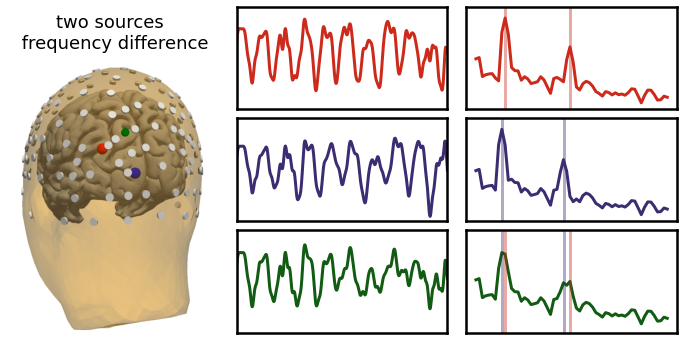

In [18]:
# Create the animated plot for the frequency difference
build_all_fr(freq1, freq2s, save=SAVE)

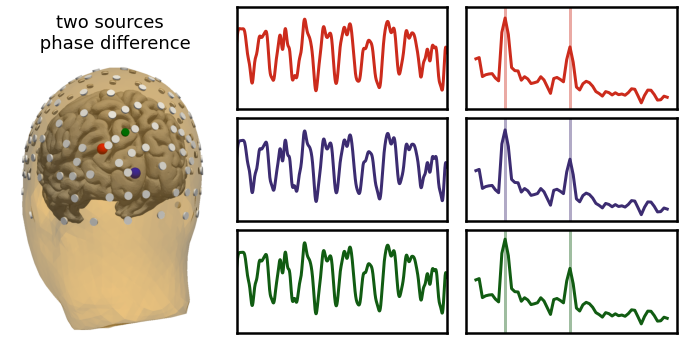

In [19]:
# Create the animated plot for the phase difference
build_all_ph(freq1, phases, save=SAVE)